# View the result of many simulations

In [146]:
import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
from matplotlib.colors import LogNorm
%matplotlib inline
from IPython.display import Image, display
from scipy.interpolate import interp1d

In [147]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [148]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# config LSST

In [149]:
all_filternum = {'u':1, 'g':2, 'r':3, 'i':4, 'z':5, 'y':6}
all_filtercolors = {'u':'b', 'g':'g', 'r':'r', 'i':'y', 'z':'grey', 'y':'k'}
all_filtername= ['u','g','r','i','z','y']

In [150]:
NBFILT=len(all_filternum)

# Input Data

In [151]:
#path_data="/sps/lsst/data/PCWG_MiniDataChallenge/pickles_uvk/2018-07-08/"
path_data="/Users/dagoret/DATA/PCWG_MiniDataChallenge_2018/pickles_uvk/2018-07-08"
filename="dft.csv"

In [152]:
fullfilename=os.path.join(path_data,filename)

# data field
| airmass    |    filter(1..6)  |  vaod   |  o3   |   pwv  |   clouds    |    instrum-mag (ADU) |       error-mag |

In [153]:
dft=pd.read_csv(fullfilename,index_col=0)

In [154]:
dft.head()

,am,f,vaod,ozone,pwv,clouds,mag,magerr
0,1.3710,2.0,0.024,265.664,2.823,0.638,-11.38819,0.00730
1,1.2740,2.0,0.051,249.295,4.568,1.000,-11.86091,0.00644
2,1.0251,5.0,0.067,292.946,9.803,0.931,-13.47045,0.00767
3,1.0120,5.0,0.042,301.130,6.895,1.000,-13.56771,0.00764
4,1.0303,6.0,0.057,284.761,3.405,1.000,-13.04024,0.00788


In [155]:
#dft.loc[:, ~df.columns.str.contains('^Unnamed')]

In [156]:
#dft.columns = ['am', 'f', 'vaod', 'ozone', 'pwv','clouds','mag','magerr']

In [157]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

# Plot error vs Magnitude

In [158]:
MAGMIN=[-12.5,-15.,-16.,-16.,-16.,-15.]
MAGMAX=[3.0,-5.0,-6.,-5.,-4.,-2 ]

Text(0.5,0.98,'Instrumental magnitudes and errors in filters U, G, R')

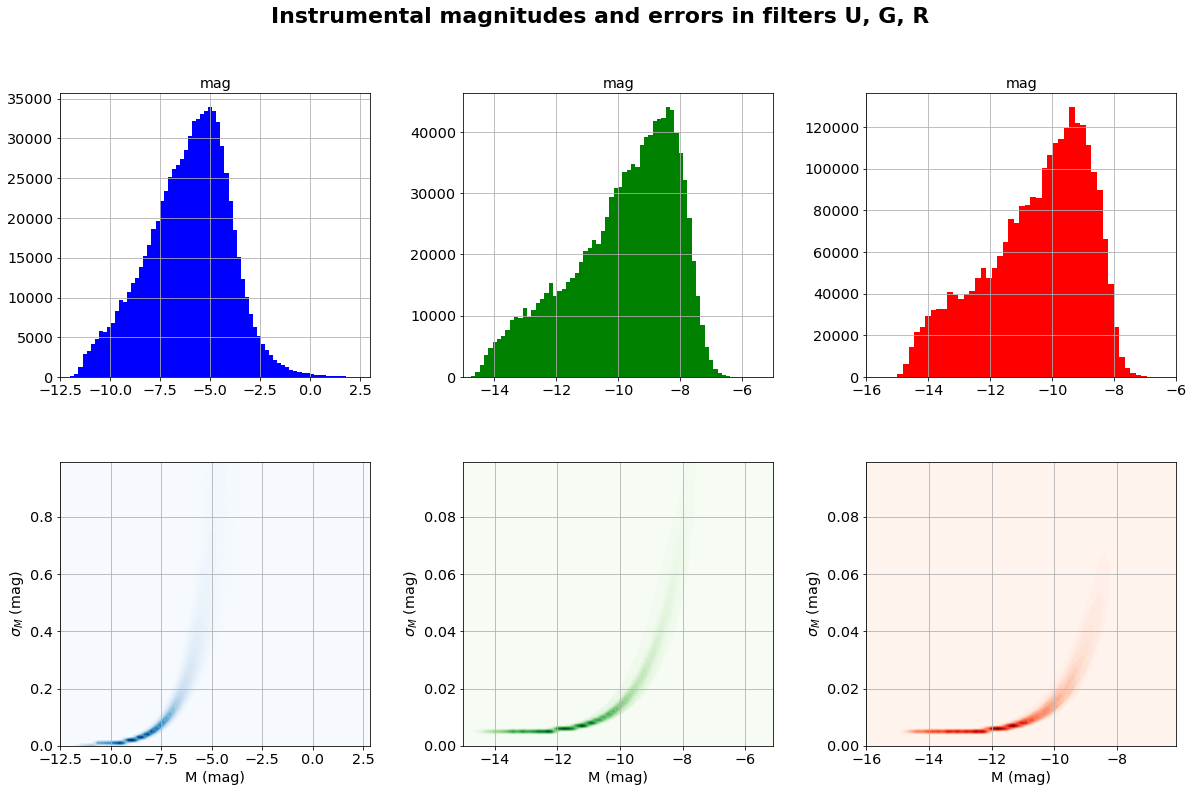

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])
# blue
#------
dfu=dft.loc[dft['f']==1]
m,sig,c=dfu['mag'].describe()['mean'],dfu['mag'].describe()['std'],int(dfu['mag'].describe()['count'])
thelabel="U : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 1)].hist('mag',bins=100,ax=axes[0,0],grid=True,color='b')
axes[0,0].set_xlim(MAGMIN[0],MAGMAX[0])

#dft.loc[(dft.f == 1)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (u)',ax=axes[1,0],color='b',grid=True)
xedges=np.linspace(MAGMIN[0],MAGMAX[0],101)
yedges=np.linspace(0,1.,101)
X=dfu["mag"]
Y=dfu["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,0].contourf(Xgr,Ygr,H,100,vmin=H.min(),vmax=H.max(),cmap="Blues")
axes[1,0].grid(True)
axes[1,0].set_xlabel("M (mag)")
axes[1,0].set_ylabel("$\sigma_M$ (mag)")
#Xgr, Ygr = np.meshgrid(xedges, yedges)
#axes[1,0].pcolormesh(Xgr, Ygr, H,cmap='cool')




#axes[1,0].imshow(H, interpolation='nearest', origin='low',cmap='cool',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#axes[1,0].set_xlim(MAGMIN[0],MAGMAX[0])

# green
#---------
dfg=dft.loc[dft['f']==2]
m,sig,c=dfg['mag'].describe()['mean'],dfg['mag'].describe()['std'],int(dfg['mag'].describe()['count'])
thelabel="G : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 2)].hist('mag',bins=100,ax=axes[0,1],grid=True,color='g')
axes[0,1].set_xlim(MAGMIN[1],MAGMAX[1])


#dft.loc[(dft.f == 2)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (g)',ax=axes[1,1],color='g',grid=True)
#axes[1,1].set_xlim(MAGMIN[1],MAGMAX[1])
xedges=np.linspace(MAGMIN[1],MAGMAX[1],101)
yedges=np.linspace(0,0.1,101)
X=dfg["mag"]
Y=dfg["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,1].contourf(Xgr,Ygr,H,50,vmin=H.min(),vmax=H.max(),cmap="Greens")
axes[1,1].grid(True)
axes[1,1].set_xlabel("M (mag)")
axes[1,1].set_ylabel("$\sigma_M$ (mag)")


#red
dfr=dft.loc[dft['f']==3]
m,sig,c=dfr['mag'].describe()['mean'],dfr['mag'].describe()['std'],int(dfr['mag'].describe()['count'])
thelabel="R : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 3)].hist('mag',bins=50,ax=axes[0,2],grid=True,color='r')
axes[0,2].set_xlim(MAGMIN[2],MAGMAX[2])
#dft.loc[(dft.f == 3)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (r)',ax=axes[1,2],color='r',grid=True)
#axes[1,2].set_xlim(MAGMIN[2],MAGMAX[2])

xedges=np.linspace(MAGMIN[2],MAGMAX[2],101)
yedges=np.linspace(0,0.1,101)
X=dfr["mag"]
Y=dfr["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,2].contourf(Xgr,Ygr,H,50,vmin=H.min(),vmax=H.max(),cmap="Reds")
axes[1,2].grid(True)
axes[1,2].set_xlabel("M (mag)")
axes[1,2].set_ylabel("$\sigma_M$ (mag)")


#
plt.suptitle("Instrumental magnitudes and errors in filters U, G, R",fontweight='bold',fontsize=22)

Text(0.5,0.98,'Instrumental magnitudes and errors in filters I,Z,Y ')

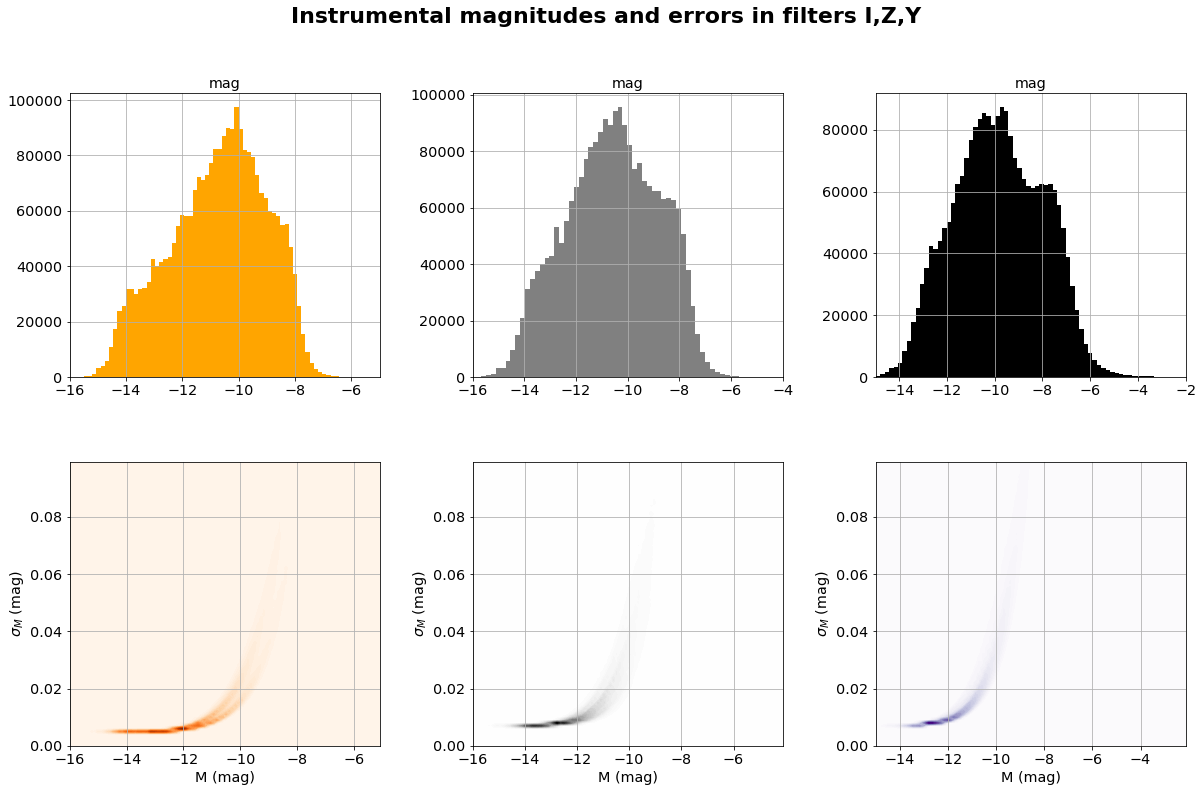

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,12))
#
dfi=dft.loc[dft['f']==4]
m,sig,c=dfi['mag'].describe()['mean'],dfi['mag'].describe()['std'],int(dfi['mag'].describe()['count'])
thetitle="I : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 4)].hist('mag',bins=100,ax=axes[0,0],grid=True,color='orange')
axes[0,0].set_xlim(MAGMIN[3],MAGMAX[3])
#dft.loc[(dft.f == 4)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (y)',ax=axes[1,0],color='orange',grid=True)
#axes[1,0].set_xlim(MAGMIN[3],MAGMAX[3])

xedges=np.linspace(MAGMIN[3],MAGMAX[3],101)
yedges=np.linspace(0,0.1,101)
X=dfi["mag"]
Y=dfi["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,0].contourf(Xgr,Ygr,H,50,vmin=H.min(),vmax=H.max(),cmap="Oranges")
axes[1,0].grid(True)
axes[1,0].set_xlabel("M (mag)")
axes[1,0].set_ylabel("$\sigma_M$ (mag)")



#
dfz=dft.loc[dft['f']==5]
m,sig,c=dfz['mag'].describe()['mean'],dfz['mag'].describe()['std'],int(dfz['mag'].describe()['count'])
thetitle="Z : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 5)].hist('mag',bins=100,ax=axes[0,1],grid=True,color='grey')
axes[0,1].set_xlim(MAGMIN[4],MAGMAX[4])
#dft.loc[(dft.f == 5)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (z)',ax=axes[1,1],color='grey',grid=True)
#axes[1,1].set_xlim(MAGMIN[4],MAGMAX[4])

xedges=np.linspace(MAGMIN[4],MAGMAX[4],101)
yedges=np.linspace(0,0.1,101)
X=dfz["mag"]
Y=dfz["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,1].contourf(Xgr,Ygr,H,50,vmin=H.min(),vmax=H.max(),cmap="Greys")
axes[1,1].grid(True)
axes[1,1].set_xlabel("M (mag)")
axes[1,1].set_ylabel("$\sigma_M$ (mag)")



#

dfy=dft.loc[dft['f']==6]
m,sig,c=dfy['mag'].describe()['mean'],dfy['mag'].describe()['std'],int(dfy['mag'].describe()['count'])
thetitle="Y : m={:3.2f} $\sigma=${:3.2f} c={} ".format(m,sig,c)
dft.loc[(dft.f == 6)].hist('mag',bins=100,ax=axes[0,2],grid=True,color='k')
axes[0,2].set_xlim(MAGMIN[5],MAGMAX[5])
#dft.loc[(dft.f == 6)].plot.scatter(x='mag',y='magerr',marker='.',title='err vs mag (y)',ax=axes[1,2],color='k',grid=True)
#axes[1,2].set_xlim(MAGMIN[5],MAGMAX[5])
xedges=np.linspace(MAGMIN[5],MAGMAX[5],101)
yedges=np.linspace(0,0.1,101)
X=dfy["mag"]
Y=dfy["magerr"]
H, xedges, yedges = np.histogram2d(X, Y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
Xgr, Ygr = np.meshgrid(xedges[:-1], yedges[:-1])
cs=axes[1,2].contourf(Xgr,Ygr,H,50,vmin=H.min(),vmax=H.max(),cmap="Purples")
axes[1,2].grid(True)
axes[1,2].set_xlabel("M (mag)")
axes[1,2].set_ylabel("$\sigma_M$ (mag)")


#
plt.suptitle("Instrumental magnitudes and errors in filters I,Z,Y ",fontweight='bold',fontsize=22)